# Assignment08 : Polynomial Least Square in Python
# Name : Joonoh-Oh
# Student-ID : 20146136
# Github : https://github.com/jooh95/assignment08

# Set the training data file and test data fle.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Define the feature function.

In [4]:
def f(x):
    e = np.ones(size_row * size_col)
    y = e * x
    return y.T

# Define the sign function.

In [5]:
def sign(x):
    if(x > 0):
        return 1
    else :
        return -1  

# Define the normalize function.

In [6]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Make a matrix each column of which represents an images in a vector form 

In [7]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# Get the training data.

In [8]:
count = 0
for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    
    if(label == '0'):
        list_label_train[count] = 0
    else :
        list_label_train[count] = 1

    list_image_train[:, count]  = im_vector 

    count += 1

# Make the training data into a vector.

In [9]:
A = np.empty((num_train, size_row * size_col), dtype=float)

for i in range(0, num_train):
    A[i] = f(list_image_train[:,i])

# Delete zero columns because of linear independence.

In [10]:
zero_idx = []
for i in range(0, size_row * size_col):
    if np.all(A.T[i] == 0):
        zero_idx.append(i)

A = np.delete(A, zero_idx, axis=1)

# Calculate the theta value.

In [11]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),list_label_train[:])

print("Theta Value")
print(theta)

Theta Value
[ 6.83005178e+15 -3.11923624e+15  2.33277539e+16 -4.92593369e+17
 -1.81469982e+03  6.52284185e+02 -2.45635457e+01  9.79848329e+00
 -2.42563365e+00  4.65744625e-01 -2.19071918e-02 -1.78687831e-01
  4.08571279e-01 -6.31186023e-01  1.96237268e-01 -1.51723672e-01
  2.51420574e-01 -3.15374414e-01  4.03466108e-01 -1.67053500e+00
  2.77105828e+00 -2.46781463e+00 -8.04724419e+00  1.34072344e+01
  7.33909599e+00  8.41355271e+01  3.04392363e+00  1.08577912e+01
 -3.94198143e+00  1.56372302e+00  1.86202631e-01 -1.38959054e-01
  9.92346860e-02  3.48863265e-02 -5.90389204e-03  1.65315126e-01
 -9.55186907e-02  9.55310634e-02  9.88963218e-02 -1.90517613e-02
  9.41741411e-02  4.54951441e-02 -1.29544129e-01  1.51789035e-01
  3.81260518e-01 -1.52232430e-02 -2.61710963e+00  5.21163058e+00
 -1.07677675e+00 -9.11897815e+00  2.18739105e+00  8.30274263e-01
 -2.89163383e-01  1.42955209e-01 -8.70846447e-02  8.49048336e-02
 -1.16795493e-02  2.60641181e-02  5.98048382e-02 -5.04479133e-02
  7.63383359e

# Visualize the theta.

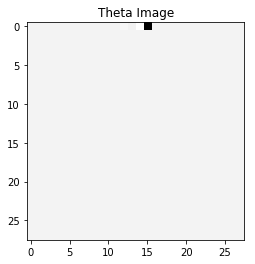

In [12]:
theta_vector = np.zeros((size_row * size_col, ), dtype=float)

idx = 0
for i in range(0, size_row * size_col):
    if(not (i in zero_idx)):
        theta_vector[i] = theta[idx]
        idx += 1

theta_image = np.zeros((size_row, size_col), dtype=float)

for i in range(0, 28):
    theta_image[i] = theta_vector[i*28:(i+1)*28]
    
plt.title("Theta Image")
plt.imshow(theta_image, cmap='gray')
plt.show()

# Get the test data.

In [13]:
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    if(label == '0'):
        list_label_test[count] = 0
    else :
        list_label_test[count] = 1
        
    list_image_test[:, count]   = im_vector    

    count += 1

# Make the test data into a vector.

In [14]:
X = np.empty((num_test, size_row * size_col), dtype=float)
for i in range(0, num_test):
    X[i] = f(list_image_test[:,i])
    
X = np.delete(X, zero_idx, axis=1)

# Calculate True Positive, False Positive, True Negative, and False Negative. 

In [15]:
tp = 0
fp = 0
tn = 0
fn = 0

tp_vector = np.zeros((size_row * size_col, ), dtype=float)
fp_vector = np.zeros((size_row * size_col, ), dtype=float)
tn_vector = np.zeros((size_row * size_col, ), dtype=float)
fn_vector = np.zeros((size_row * size_col, ), dtype=float)
for i in range(0, num_test) :
    if(sign(np.dot(X[i], theta.T)) == 1 and list_label_test[i] == 0):
        tp += 1
        tp_vector += list_image_test[:,i]
    elif(sign(np.dot(X[i], theta.T)) == 1 and list_label_test[i] == 1):
        fp += 1
        fp_vector += list_image_test[:,i]
    elif(sign(np.dot(X[i], theta.T)) == -1 and list_label_test[i] == 1):
        tn += 1
        tn_vector += list_image_test[:,i]
    elif(sign(np.dot(X[i], theta.T)) == -1 and list_label_test[i] == 0):
        fn += 1
        fn_vector += list_image_test[:,i]

print("True Positive value : %d" %tp)
print("False Positive value : %d" %fp)
print("True Negative value : %d" %tn)
print("False Negative value : %d" %fn)   

True Positive value : 824
False Positive value : 9012
True Negative value : 8
False Negative value : 156


# Visualize True Positive, False Positive, True Negative, and False Negative Average Image.

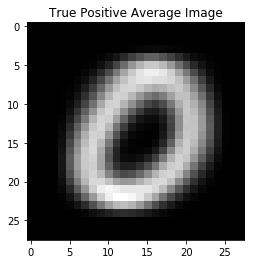

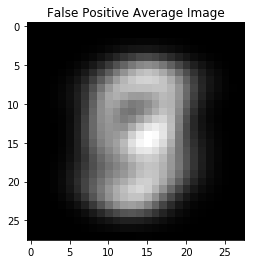

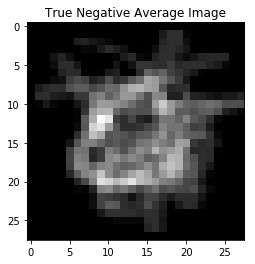

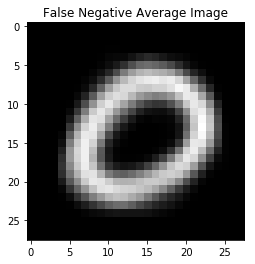

In [16]:
tp_image = np.zeros((size_row, size_col), dtype=float)
fp_image = np.zeros((size_row, size_col), dtype=float)
tn_image = np.zeros((size_row, size_col), dtype=float)
fn_image = np.zeros((size_row, size_col), dtype=float)
    
for i in range(0, 28):
    tp_image[i] = tp_vector[i*28:(i+1)*28] / tp
    fp_image[i] = fp_vector[i*28:(i+1)*28] / fp
    tn_image[i] = tn_vector[i*28:(i+1)*28] / tn
    fn_image[i] = fn_vector[i*28:(i+1)*28] / fn

plt.title("True Positive Average Image")
plt.imshow(tp_image / tp, cmap='gray')
plt.show()

plt.title("False Positive Average Image")
plt.imshow(fp_image / fp, cmap='gray')
plt.show()

plt.title("True Negative Average Image")
plt.imshow(tn_image / tn, cmap='gray')
plt.show()

plt.title("False Negative Average Image")
plt.imshow(fn_image / fn, cmap='gray')
plt.show()